In [50]:
import pandas as pd # pandas is a package and is helpful for data manipulation
import matplotlib.pyplot as plt
import scipy.stats

In [9]:
filepath_hospital = r"C:\Users\Vanita\Documents\mdst_workshops\mdst_workshop3\exploratory data analysis\HospitalAdmissionsData.csv";

hospital = pd.read_csv(filepath_hospital)

#the column headers are id, admissionlengthdays, death_1, admission_type, insurance_type, englishlanguage_1, religion_type, married_1, race, Dx


In [13]:

hospital.columns

Index(['ID', 'AdmissionLengthDays', 'Death_1', 'Admission_Type',
       'Insurance_Type', 'EnglishLanguage_1', 'Religion_Type', 'Married_1',
       'Race', 'Dx'],
      dtype='object')

In [22]:
hospital.head()

,ID,AdmissionLengthDays,Death_1,Admission_Type,Insurance_Type,EnglishLanguage_1,Religion_Type,Married_1,Race,Dx
0,42862,4.277778,0,elective,private,1,episcopalian,1,white,mitral stenosis\mitral valve replacement /sda
1,5967,26.122917,0,elective,private,0,catholic,1,white,duodenal mass/sda
2,50952,7.028472,1,emergency,medicare,1,catholic,0,asian - japanese,? serotonin syndrome
3,17138,34.187500,0,elective,medicare,1,catholic,1,white,abdominal aortic aneurysm/sda
4,27703,6.165972,0,elective,government,0,protestant quaker,0,black/african american,absence/sda


In [17]:
hospital.info()
#There is 1 float value, 4 int values, and 5 object values (Admission_Type, Insurance_type,Relgiion_type, Race, Dx)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58863 entries, 0 to 58862
Data columns (total 10 columns):
ID                     58863 non-null int64
AdmissionLengthDays    58863 non-null float64
Death_1                58863 non-null int64
Admission_Type         58863 non-null object
Insurance_Type         58863 non-null object
EnglishLanguage_1      58863 non-null int64
Religion_Type          58408 non-null object
Married_1              58863 non-null int64
Race                   58863 non-null object
Dx                     58863 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 4.5+ MB


In [14]:
hospital.Insurance_Type.unique()

array(['private', 'medicare', 'government', 'medicaid', 'self pay'],
      dtype=object)

In [19]:
hospital.AdmissionLengthDays.describe()

count    58863.000000
mean        10.138978
std         12.465611
min         -0.945139
25%          3.743056
50%          6.465972
75%         11.798264
max        294.660417
Name: AdmissionLengthDays, dtype: float64

In [21]:
hospital.describe(include='object')
#The most common admission type is emergency, most common insurance type is medicare, most common religion type is catholic, the msot common race is white, and the most common Dx is newborn

,Admission_Type,Insurance_Type,Religion_Type,Race,Dx
count,58863,58863,58408,58863,58863
unique,4,5,20,41,15647
top,emergency,medicare,catholic,white,newborn
freq,41987,28157,20561,40927,7823


Text(0, 0.5, 'Counts')

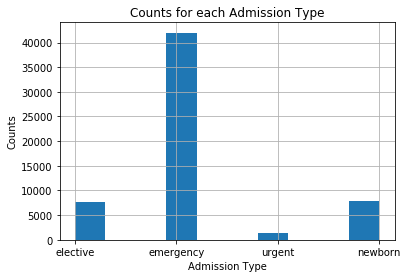

In [26]:
hospital.Admission_Type.hist()
plt.title("Counts for each Admission Type")
plt.xlabel("Admission Type")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts on log scale')

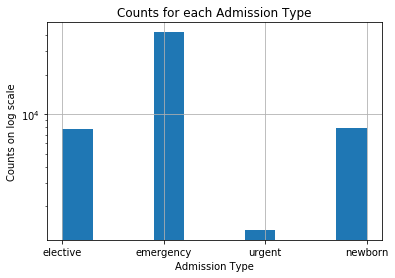

In [28]:
hospital.Admission_Type.hist(log=True)
plt.title("Counts for each Admission Type")
plt.xlabel("Admission Type")
plt.ylabel("Counts on log scale")

In [35]:
death = hospital.groupby("Death_1").mean()
print(death)
#The means are approximately the same


                   ID  AdmissionLengthDays  EnglishLanguage_1  Married_1
Death_1                                                                 
0        29484.310219            10.140012           0.576748   0.406765
1        29724.728811            10.129606           0.519651   0.446001


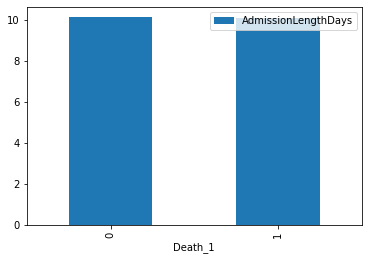

In [36]:
death.plot.bar(y="AdmissionLengthDays")

In [48]:
hospitaldeath = pd.crosstab(hospital.Death_1, hospital.Insurance_Type)
hospitaldeath1 = hospital.groupby("Death_1").count()
print(hospitaldeath1)



            ID  AdmissionLengthDays  Admission_Type  Insurance_Type  \
Death_1                                                               
0        53011                53011           53011           53011   
1         5852                 5852            5852            5852   

         EnglishLanguage_1  Religion_Type  Married_1   Race     Dx  
Death_1                                                             
0                    53011          52653      53011  53011  53011  
1                     5852           5755       5852   5852   5852  


In [53]:
chi= scipy.stats.chi2_contingency(hospitaldeath)
print(chi)
#The null hypothesis (no association between admission length and death) is rejected. 

(990.8535593949656, 3.425615316200906e-213, 4, array([[ 1603.93780473,  5206.26864074, 25357.70733738, 20293.73076466,
          549.35545249],
       [  177.06219527,   574.73135926,  2799.29266262,  2240.26923534,
           60.64454751]]))
